In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Time Analysis

In [2]:
time_df = pd.read_csv("time_data.csv")

In [3]:
time_df.describe().drop("count")

,Original_AES_Encryption_Time,Original_AES_Decryption_Time,Josephus_AES_Encryption_Time,Josephus_AES_Decryption_Time,Modified_AES_Encryption_Time,Modified_AES_Decryption_Time
mean,0.005631,0.006234,0.002037,0.001655,0.001280,0.001292
std,0.001467,0.001584,0.000728,0.000667,0.000518,0.000527
min,0.003033,0.003952,0.000613,0.000664,0.000029,0.000521
25%,0.004983,0.004987,0.001964,0.000998,0.000997,0.000997
50%,0.004989,0.005984,0.001995,0.001971,0.000998,0.000998
75%,0.005995,0.006981,0.001998,0.001995,0.001955,0.001961
max,0.020943,0.021942,0.008487,0.005986,0.005016,0.006980


In [4]:
time_df.head(10)

,Original_AES_Encryption_Time,Original_AES_Decryption_Time,Josephus_AES_Encryption_Time,Josephus_AES_Decryption_Time,Modified_AES_Encryption_Time,Modified_AES_Decryption_Time
0,0.003989,0.004987,0.001995,0.001994,0.000997,0.000998
1,0.003989,0.005984,0.000998,0.000998,0.001995,0.000997
2,0.005985,0.007006,0.001994,0.001962,0.003001,0.001029
3,0.004954,0.004987,0.002030,0.000998,0.000994,0.000999
4,0.004955,0.005985,0.002030,0.000963,0.000994,0.002035
5,0.007941,0.004985,0.002027,0.000965,0.001995,0.001029
6,0.003980,0.004987,0.001997,0.000995,0.000996,0.000996
7,0.004992,0.005950,0.000998,0.001035,0.000994,0.001991
8,0.006948,0.005985,0.002027,0.000962,0.000998,0.001030
9,0.003992,0.004988,0.001995,0.001961,0.000996,0.001031


In [5]:
# time_df_mean = time_df.mean()
# plt.figure(figsize=(11,3))
# plt.bar(['Original AES Encryption Time', 
#          'Josephus AES Encryption Time', 
#          'Original AES Decryption Time', 
#          'Josephus AES Decryption Time'],
#         [time_df_mean['Original_AES_Encryption_Time']*1000,
#         time_df_mean['Josephus_AES_Encryption_Time']*1000,
#         time_df_mean['Original_AES_Decryption_Time']*1000,
#         time_df_mean['Josephus_AES_Decryption_Time']*1000]
#        ,color=['#5555FF','#FFAA00']*2
#        ,width=0.4)
# plt.ylabel('Millisecond')
# plt.title('Time used for encryption and decryption per state')
# plt.show()

#Fallback graph

In [6]:
time_df.mean()

Original_AES_Encryption_Time    0.005631
Original_AES_Decryption_Time    0.006234
Josephus_AES_Encryption_Time    0.002037
Josephus_AES_Decryption_Time    0.001655
Modified_AES_Encryption_Time    0.001280
Modified_AES_Decryption_Time    0.001292
dtype: float64

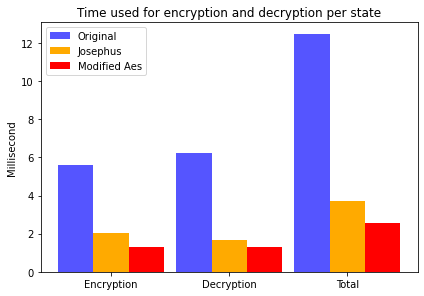

In [7]:
time_df_mean = time_df.mean()
labels = ["Encryption", "Decryption", "Total"]
bar_width = 0.3

fig, ax = plt.subplots()
x = np.arange(len(labels))

ax.bar(x - bar_width, 
       [time_df_mean['Original_AES_Encryption_Time']*1000,
        time_df_mean['Original_AES_Decryption_Time']*1000,
        (time_df_mean['Original_AES_Decryption_Time']+time_df_mean['Original_AES_Decryption_Time'])*1000
       ],
       bar_width, label='Original', color='#5555FF')
ax.bar(x,
       [time_df_mean['Josephus_AES_Encryption_Time']*1000,
        time_df_mean['Josephus_AES_Decryption_Time']*1000,
        (time_df_mean['Josephus_AES_Encryption_Time']+time_df_mean['Josephus_AES_Decryption_Time'])*1000
       ],
       bar_width, label='Josephus', color='#FFAA00')
ax.bar(x + bar_width,
       [time_df_mean['Modified_AES_Encryption_Time']*1000,
        time_df_mean['Modified_AES_Decryption_Time']*1000,
        (time_df_mean['Modified_AES_Encryption_Time']+time_df_mean['Modified_AES_Decryption_Time'])*1000
       ],
       bar_width, label='Modified Aes', color='#FF0000')


ax.set_ylabel('Millisecond')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.title('Time used for encryption and decryption per state')
plt.show()

# Avalanche Analysis

In [8]:
avalanche_df = pd.read_csv("avalanche_data.csv")
avalanche_df["Original_AES_Avalanche"] = avalanche_df["Original_AES_Avalanche"].astype(float)*100
avalanche_df["Josephus_AES_Avalanche"] = avalanche_df["Josephus_AES_Avalanche"].astype(float)*100
avalanche_df["Modified_AES_Avalanche"] = avalanche_df["Modified_AES_Avalanche"].astype(float)*100

In [9]:
avalanche_df[["Original_AES_Avalanche","Josephus_AES_Avalanche"]].describe().drop("count")

,Original_AES_Avalanche,Josephus_AES_Avalanche
mean,49.943672,50.002656
std,4.411240,4.545705
min,34.375000,1.562500
25%,46.875000,46.875000
50%,50.000000,50.000000
75%,53.125000,53.125000
max,65.625000,68.750000


In [10]:
avalanche_df.head(10)

,Plaintext_1,Plaintext_2,Original_AES_Ciphertext_1,Original_AES_Ciphertext_2,Original_AES_Avalanche,Josephus_AES_Ciphertext_1,Josephus_AES_Ciphertext_2,Josephus_AES_Avalanche,Modified_AES_Ciphertext_1,Modified_AES_Ciphertext_2,Modified_AES_Avalanche
0,"%7c:PFDT<0]jaz%""","%7c:PpDT<0]jaz%""",24c8fd5dd346361dc0d3d093f6d7412a,8e3ccce280ba7288dfabeb3fdd975dcb,50.78125,a67e3957e7e75926ad40d24999af42b1,dfdf4a0f95a9d1abf11098bb99b5f059,42.96875,6c7ae0ba12fd3f319a9469249df2188b,6c7ae0ba123d3f319a9469249df2188b,1.56250
1,xv7;&/{'`kz>pDQ9,xv7;&/.'`kz>pDQ9,1da175b4468abf3ebc69a0dbd08ace69,39dc028fbf029f9704e566522885a5d3,50.78125,2d53e8b781802438eec69ac9e4bfe53f,de881330559a8ad92ee5fbb0ae2ce5b0,50.00000,844a4105cdcd9a94f5668d0b68c587fc,844a4105cdcd2394f5668d0b68c587fc,3.90625
2,`-&x7dzs-e/f_K8T,`-&x7dzl-e/f_K8T,04bcb3ecd7b20362312fb952a1eef568,becbce783b60fe87888353d53e70d63d,60.15625,e296e263874ebe2ea6394c200cfd6ad6,9e74a1ac3b7da0915c2ff4f6a121092e,58.59375,04b2fdd626a5c0d88119cd97d4f936b8,04b2fdd626a5c0528119cd97d4f936b8,2.34375
3,ZP4+0FN:moA|*20p,ZP4+0FN:moAA*20p,f56797a502d178e4cb0470eb44fbfea1,2408822c0293892020787b2b8a793e17,43.75000,49bffffcc008067ef7543ac9243ac749,2cba9f3f11077a1821309d2fa385b190,53.12500,71ebb70a48fd3c40d8272d420d4537c8,71ebb70a48fd3c40d8272db70d4537c8,4.68750
4,`:}3@y:_t='Y7znE,`:}3@y:_t='Y7zzE,6d17d71c744fe86f9650c34e3018a371,38a30eeea1a7486884dbeaea312e530b,45.31250,2ba3ba0cbe6645e7d3f7e2de5ddec12d,110dbcd92f56293edb88749084cc8ac6,49.21875,0493353fe946a68d1ba986545ef235e8,0493353fe946a68d1ba986545ef2f0e8,3.12500
5,"(a$=zct?h\J0,PN[","(a$=zctSh\J0,PN[",e258e25a23a114fa07cd9fa013073da9,674faebb62aec375e4762b0099a8b46a,50.00000,50c88eb4ab9d8df64b6822b0021d8194,53e9592e0c7ba5bbdb2aff75e2db2857,46.09375,5a26a795e6bf208688707ce0560da62a,5a26a795e6bf201e88707ce0560da62a,2.34375
6,=`j$#TsLpiNGCD0d,=`C$#TsLpiNGCD0d,36de3ab87afc88194193c2cabe5e6d60,692053b588454196d25e6fbe2318cb8c,57.81250,7db576dd05b1ba19dbd8cbd97e238bec,0b453595dc136a7848d7454b52c6e609,47.65625,64c39104471696faf116176d5cc537af,64c32304471696faf116176d5cc537af,3.12500
7,t3^&zMYDLpf0^oDV,ty^&zMYDLpf0^oDV,422855a293abc44e3aecf1c5ec570831,6c975ce59d7e8568d2ec174a943a30f3,46.09375,e22eb36749bb42c958833d737cde5a5d,2449a8e6489ea9cd252c0c83bb4a5797,46.87500,9f37b303e6c6d0d358c904e0a51133f1,9f66b303e6c6d0d358c904e0a51133f1,2.34375
8,"RTh,v+6>)jR$Pdp6","!Th,v+6>)jR$Pdp6",7861330791a7a9a594f3d5cdfd3e7711,dd7a92a7e30850a8a97845b5f86a9557,46.09375,cfe6db7e36a9ee9eb1f0ffa240c1cfe2,17dd0f462c1de6d65754e0c86d420b13,45.31250,58245e589201c5127793bec95b22956d,47245e589201c5127793bec95b22956d,3.90625
9,"7@fIl+J,>U&/'H]1","7@fIlXJ,>U&/'H]1",f9bcdb7a1722039828fd668284dab882,6cd71dadb91fef2cc9bc9b591d7d0e5c,60.15625,dd78eacc019aa7c4f2671fa8a2ec7cd9,1987fdb1b8a628e519621429836deb38,49.21875,b58d5b1738019cb55556015f559584f0,b58d5b1738d19cb55556015f559584f0,2.34375


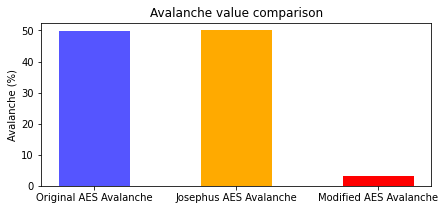

In [11]:
avalanche_df_mean = avalanche_df.mean()
plt.figure(figsize=(7,3))
plt.bar(['Original AES Avalanche', 
         'Josephus AES Avalanche',
         'Modified AES Avalanche'],
        [avalanche_df_mean['Original_AES_Avalanche'],
        avalanche_df_mean['Josephus_AES_Avalanche'],
        avalanche_df_mean['Modified_AES_Avalanche']]
       ,color=['#5555FF','#FFAA00','#FF0000']
       ,width=0.5)
plt.ylabel('Avalanche (%)')
plt.title('Avalanche value comparison')
plt.show()